# Notebook lecture 3: State Feedback for CS2
&copy; 2025 ETH Zurich, Joël Gmür, Joël Lauper, Niclas Scheuer, Dejan Milojevic; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

Authors:
- Joël Gmür; jgmuer@ethz.ch
- Joël Lauper; jlauper@ethz.ch

To start, run the following cell to install the necessary modules and import the libraries.

In [4]:
# Import the required python libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg


# Exercise 1: Pole placement

No we provide a map where you can move the poles around and see the step response.

# Exercise 2: LQR

We use the simple example of a mass-spring-damper to show what happens if we change the state error weight $Q$ and the input weight $R$.

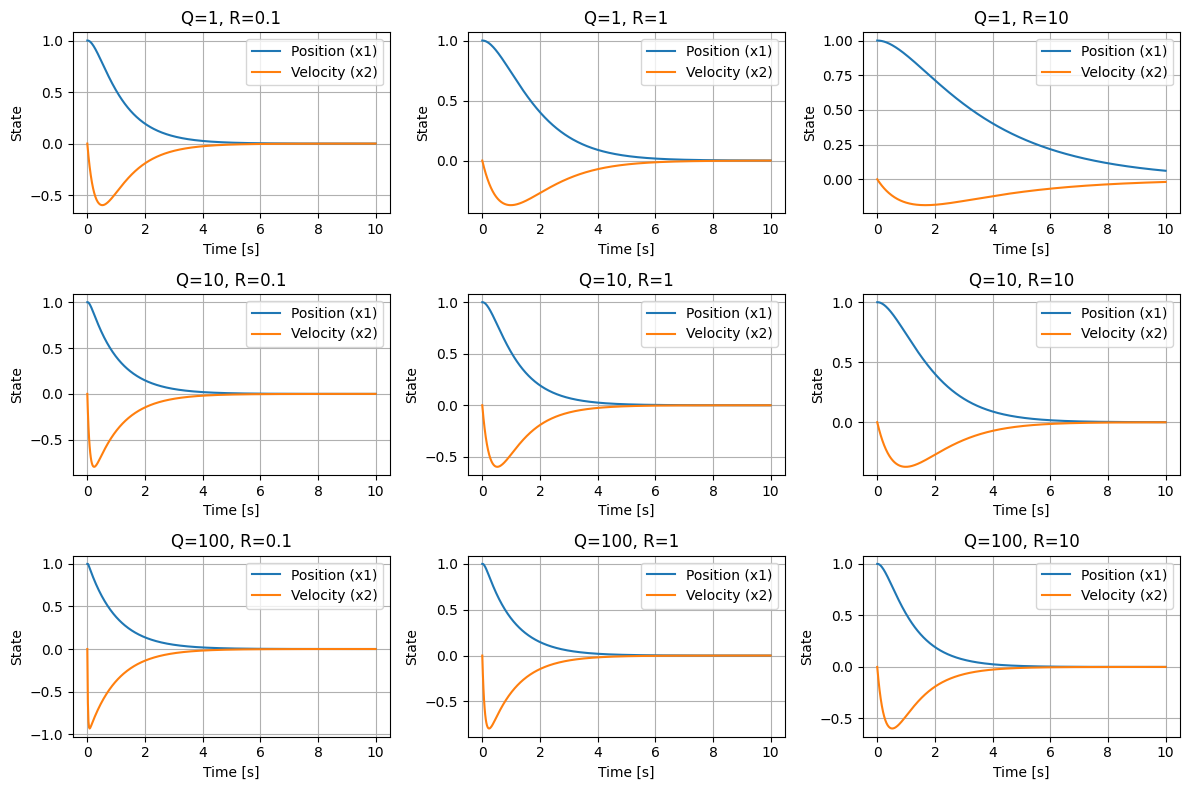

In [5]:
# Define the state-space system (simple 2D system)
A = np.array([[0, 1],
              [0, -1]])  # System dynamics 
B = np.array([[0], [1]])  # Input matrix
C = np.array([[1, 0]])    # Output matrix (we care about position)
D = np.array([[0]])       

# Function to compute the LQR controller gain
def compute_lqr(A, B, Q, R):
    # Solve the continuous-time algebraic Riccati equation (CARE)
    P = linalg.solve_continuous_are(A, B, Q, R)
    # Compute the LQR controller gain (K = inv(R) * B' * P)
    K = np.linalg.inv(R) @ B.T @ P
    return K

# Function to simulate the closed-loop system
def simulate_system(A, B, C, K, time_end=10, initial_state=[1, 0]):
    # Closed-loop system dynamics (A_cl = A - B*K)
    A_cl = A - B @ K
    
    # Time vector
    t = np.linspace(0, time_end, 500)
    
    # Simulate the system's response to the initial state
    x = np.zeros((len(t), len(initial_state)))
    x[0] = initial_state
    
    for i in range(1, len(t)):
        # State update: x_dot = A_cl * x
        x_dot = A_cl @ x[i-1]
        x[i] = x[i-1] + x_dot * (t[i] - t[i-1])  # Simple Euler integration
    
    # Plot the system's state over time
    plt.plot(t, x[:, 0], label='Position (x1)')
    plt.plot(t, x[:, 1], label='Velocity (x2)')
    plt.xlabel('Time [s]')
    plt.ylabel('State')
    plt.title('Closed-Loop System Response with LQR Control')
    plt.legend()
    plt.grid(True)

# Define different values for Q and R weights to compare
Q_values = [1, 10, 100]  # Different state error weights (Q)
R_values = [0.1, 1, 10]  # Different input weights (R)

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop over combinations of Q and R
for Q_val in Q_values:
    for R_val in R_values:
        # Define Q and R
        Q = np.diag([Q_val, Q_val])  # State error weight
        R = np.array([[R_val]])      # Input weight
        
        # Compute the LQR gain K
        K = compute_lqr(A, B, Q, R)
        
        # Simulate and plot the closed-loop system
        plt.subplot(len(Q_values), len(R_values), len(R_values)*(Q_values.index(Q_val)) + R_values.index(R_val) + 1)
        simulate_system(A, B, C, K, time_end=10)
        plt.title(f"Q={Q_val}, R={R_val}")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()